In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sess = tf.InteractiveSession()

In [3]:
image = np.zeros((100, 100))
image[25:30,80:80+5]=1

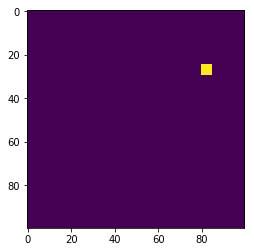

In [4]:
plt.imshow(image, interpolation='nearest')
plt.show()

In [5]:
image = tf.constant(image)
translation = tf.constant(10., shape=(1,))
rotation = tf.constant(-np.pi/2, shape=(1,))

In [6]:
rot_op = tf.contrib.image.angles_to_projective_transforms(rotation, 100, 100)

In [7]:
trans_op = tf.stack([tf.ones_like(translation), tf.zeros_like(translation), translation] + 
                    [tf.zeros_like(translation), tf.ones_like(translation), tf.zeros_like(translation)] +
                    [tf.zeros_like(translation)] * 2, axis=1)

In [8]:
trans_mat = tf.contrib.image.compose_transforms(rot_op, trans_op)
transform_op = tf.contrib.image.transform(image, trans_mat)

In [9]:
trans_op.eval()

array([[ 1.,  0., 10.,  0.,  1.,  0.,  0.,  0.]], dtype=float32)

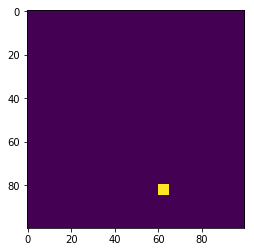

In [10]:
plt.imshow(transform_op.eval(), interpolation='nearest')
plt.show()

In [11]:
transform_op = tf.contrib.image.transform(transform_op, trans_op)

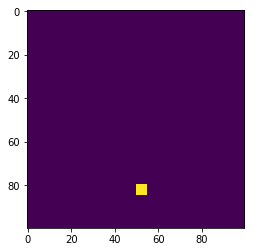

In [12]:
plt.imshow(transform_op.eval(), interpolation='nearest')
plt.show()